In [124]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dado = pd.read_csv("graph.csv")

In [125]:
dado.head()

,vertice,adjacente,peso
0,X,A-B-C,40-37-100
1,A,B,39-68
2,B,X,55
3,C,NaN,NaN


In [126]:
#Criando grafo e adicionando vertices
graph = nx.Graph()
graph.add_nodes_from(dado.vertice)

In [127]:
for i in range(len(dado.vertice.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        edges = dado.adjacente[i].split("-")
        pesos = dado.peso[i].split("-")
        for j in range(len(edges)):
            print(dado.vertice[i],edges[j],pesos[j])
            graph.add_weighted_edges_from([(dado.vertice[i],edges[j],pesos[j])]) #Arestas com pesos


X A 40
X B 37
X C 100
A B 39
B X 55


In [128]:
graph["X"]

AtlasView({'A': {'weight': '40'}, 'B': {'weight': '55'}, 'C': {'weight': '100'}})

In [129]:
edges = graph.edges
weights = [graph[u][v]['weight'] for u,v in edges]

In [130]:
for i in range(len(weights)):
    weights[i] = int(weights[i])
print(weights)
weights = [*map(lambda el: el / max(weights) * 10, weights)]


[40, 55, 100, 39]


In [131]:
edges= []
for i in graph.edges:
    edges.append(i)

In [132]:
edge_labels = {}
for i in range(len(edges)):
    edge_labels[edges[i]] = weights[i]

In [133]:
weights_node = []
for i in range(len(dado.peso.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        aux = dado.peso[i].split("-")
        for i in range(len(aux)):
            aux[i] = int(aux[i])
        weights_node.append(sum(aux))
    else:
        weights_node.append(1)
print(weights_node)

[177, 107, 55, 1]


In [134]:
weights_node = [*map(lambda el: el / max(weights_node) * 1e4, weights_node)]

/home/roque/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{('X', 'A'): Text(0.4999999751630862, 0.5000000109278468, '40'),
 ('X', 'B'): Text(7.946626690014114e-09, -2.1855693665697605e-08, '55'),
 ('X', 'C'): Text(0.50000000298122, -0.49999996721645945, '100'),
 ('A', 'B'): Text(-0.50000000298122, 0.4999999672164595, '39')}

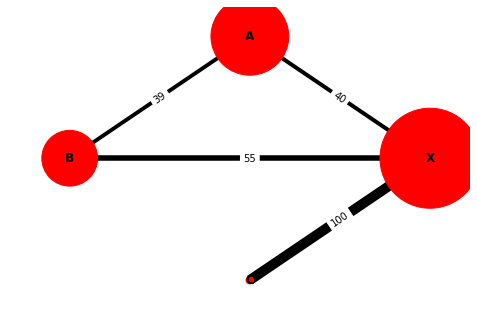

In [135]:
pos = nx.circular_layout(graph)
nx.draw(graph,pos,node_color='red',node_size=weights_node, with_labels=True, font_weight='bold',width=weights)
edge_labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels)

In [136]:
graph.adj["A"]

AtlasView({'X': {'weight': '40'}, 'B': {'weight': '39'}})